<a href="https://colab.research.google.com/github/Bhavya-Mistry/Data-Science/blob/main/iris_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [434]:
import pandas as pd
import numpy as np

In [435]:
df = pd.read_csv("Iris.csv")

In [436]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [437]:
df.drop(['Id'],inplace=True,axis=1)

In [438]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [439]:
x = df.drop(["Species"],axis=1)
x


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [440]:
y = df["Species"]
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [441]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=23, test_size=0.2)

In [442]:
from sklearn.tree import DecisionTreeClassifier

In [443]:
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 3, 5]
}


In [444]:
dt = DecisionTreeClassifier(random_state=10)
g_search = GridSearchCV(dt, grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=67),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [445]:
best_dt = grid_search.best_estimator_

In [446]:
y_pred = best_dt.predict(x_test)

In [447]:
from sklearn.metrics import accuracy_score

In [448]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", test_accuracy)

Accuracy: 0.9333333333333333


In [449]:
print("Training Accuracy:", accuracy_score(y_train, best_dt.predict(x_train)))
print("Test Accuracy:", accuracy_score(y_test, best_dt.predict(x_test)))

Training Accuracy: 0.975
Test Accuracy: 0.9333333333333333


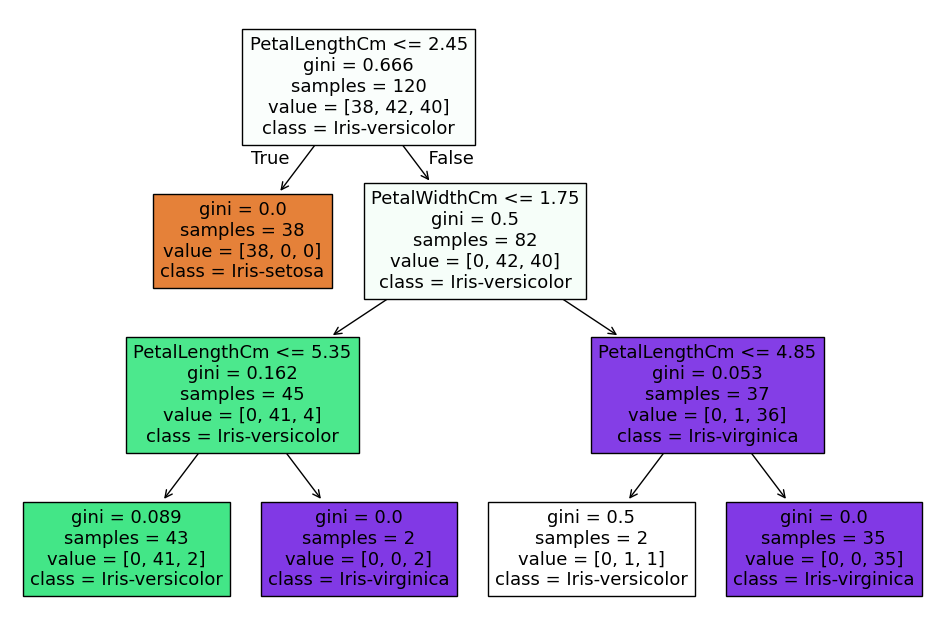

In [450]:
plt.figure(figsize=(12, 8))
plot_tree(best_dt, filled=True, feature_names=x_train.columns, class_names=y_train.unique())
plt.show()

In [451]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_dt, x, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.86666667 1.        ]
Mean CV accuracy: 0.9466666666666667


In [452]:
best_dt.predict([[23,10,24,11]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)